In [58]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans




In [59]:
data_train = pd.read_csv('poker_train.csv')
data_train

,1,10,1.1,11,1.2,13,1.3,12,1.4,1.5,9
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8
...,...,...,...,...,...,...,...,...,...,...,...
25004,3,9,2,6,4,11,4,12,2,4,0
25005,4,1,4,10,3,13,3,4,1,10,1
25006,2,1,2,10,4,4,4,1,4,13,1
25007,2,12,4,3,1,10,1,12,4,9,1


In [60]:
data_test = pd.read_csv('poker_test.csv')
data_test

,1,1.1,1.2,13,2,4,2.1,3,1.3,12,0
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...
999994,3,1,1,12,2,9,4,9,2,6,1
999995,3,3,4,5,2,7,1,4,4,3,1
999996,1,11,4,7,3,9,1,13,2,7,1
999997,3,11,1,8,1,1,3,13,2,8,1


In [61]:
data_train = pd.read_csv("poker_train.csv", header=None,
                        names=['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5', 'CLASS'])
data_train

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9
...,...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4,0
25006,4,1,4,10,3,13,3,4,1,10,1
25007,2,1,2,10,4,4,4,1,4,13,1
25008,2,12,4,3,1,10,1,12,4,9,1


In [62]:
data_test = pd.read_csv("poker_test.csv", header=None,
                        names=['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5', 'CLASS'])
data_test

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0
...,...,...,...,...,...,...,...,...,...,...,...
999995,3,1,1,12,2,9,4,9,2,6,1
999996,3,3,4,5,2,7,1,4,4,3,1
999997,1,11,4,7,3,9,1,13,2,7,1
999998,3,11,1,8,1,1,3,13,2,8,1


In [63]:
data_train.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


In [64]:
cluster=data_train[['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5']]

In [65]:
clustervar=cluster.copy() 
clustervar['S1']=preprocessing.scale(clustervar['S1'].astype('float64'))
clustervar['C1']=preprocessing.scale(clustervar['C1'].astype('float64'))
clustervar['S2']=preprocessing.scale(clustervar['S2'].astype('float64'))
clustervar['C2']=preprocessing.scale(clustervar['C2'].astype('float64'))
clustervar['S3']=preprocessing.scale(clustervar['S3'].astype('float64'))
clustervar['C3']=preprocessing.scale(clustervar['C3'].astype('float64'))
clustervar['S4']=preprocessing.scale(clustervar['S4'].astype('float64'))
clustervar['C4']=preprocessing.scale(clustervar['C4'].astype('float64'))
clustervar['S5']=preprocessing.scale(clustervar['S5'].astype('float64'))
clustervar['C5']=preprocessing.scale(clustervar['C5'].astype('float64'))

In [66]:
clus_train = clustervar

In [67]:
from scipy.spatial.distance import cdist
clusters=range(1,11)
meandist=[]

In [68]:
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1))
    / clus_train.shape[0])

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

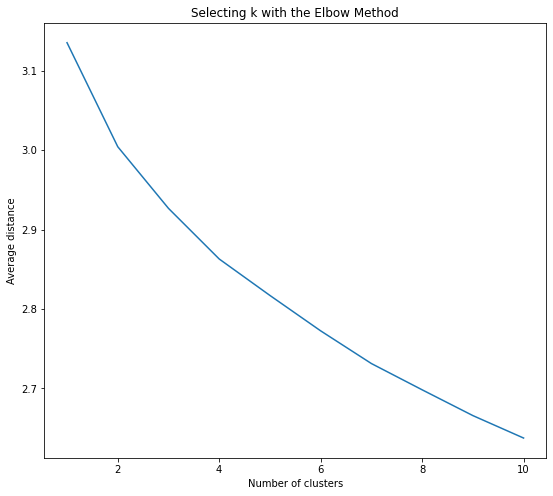

In [69]:
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

In [70]:
model3=KMeans(n_clusters=2)
model3.fit(clus_train)
clusassign=model3.predict(clus_train)

In [71]:
clus_train.reset_index(level=0, inplace=True)

In [72]:
clus_train.reset_index(level=0, inplace=True)
cluslist=list(clus_train['index'])
labels=list(model3.labels_)
newlist=dict(zip(cluslist, labels))
newlist
newclus=DataFrame.from_dict(newlist, orient='index')
newclus
newclus.columns = ['cluster']

In [73]:
newclus.reset_index(level=0, inplace=True)
merged_train=pd.merge(clus_train, newclus, on='index')
merged_train.head(n=100)
merged_train.cluster.value_counts()

1    12572
0    12438
Name: cluster, dtype: int64

In [74]:
clustergrp = merged_train.groupby('cluster').mean()
print(clustergrp)

              level_0         index        S1        C1        S2        C2  \
cluster                                                                       
0        12588.264190  12588.264190  0.017793  0.000261  0.025325  0.002400   
1        12421.628619  12421.628619 -0.017604 -0.000258 -0.025056 -0.002375   

               S3        C3        S4        C4        S5        C5  
cluster                                                              
0       -0.900274 -0.016081  0.013020 -0.005822  0.029201  0.008262  
1        0.890678  0.015910 -0.012881  0.005760 -0.028890 -0.008174  


In [75]:
pokerhand_train=data_train['CLASS']
pokerhand_test=data_test['CLASS']

In [76]:
pokerhand_train=pd.DataFrame(pokerhand_train)
pokerhand_test=pd.DataFrame(pokerhand_test)
pokerhand_train.reset_index(level=0, inplace=True) 
merged_train_all=pd.merge(pokerhand_train, merged_train, on='index')

In [77]:
sub1 = merged_train_all[['CLASS', 'cluster']].dropna()

import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

In [78]:
pokermod = smf.ols(formula='CLASS ~ C(cluster)', data=sub1).fit()
print (pokermod.summary())


                            OLS Regression Results                            
Dep. Variable:                  CLASS   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1724
Date:                Wed, 09 Nov 2022   Prob (F-statistic):              0.678
Time:                        02:54:05   Log-Likelihood:                -29540.
No. Observations:               25010   AIC:                         5.908e+04
Df Residuals:                   25008   BIC:                         5.910e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6191      0.007     

In [79]:
print ('means by cluster')
m1= sub1.groupby('cluster').mean()
print (m1)

means by cluster
            CLASS
cluster          
0        0.619071
1        0.623210


In [80]:

print ('standard deviations by cluster')
m2= sub1.groupby('cluster').std()
print (m2)

standard deviations by cluster
            CLASS
cluster          
0        0.775269
1        0.801128


In [81]:
mc1 = multi.MultiComparison(sub1['CLASS'], sub1['cluster'])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1   0.0041 0.678 -0.0154 0.0237  False
--------------------------------------------------
